In [2]:
pip install imblearn

You should consider upgrading via the '/home/CHOY0072/CZ1016/base/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('BankChurners.csv')
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
df = df.drop(columns='CLIENTNUM')

### Feature Description

#### Customer Features (unrelated to bank) 
`CLIENTNUM`: Client number. Unique identifier for the customer holding the account

`Customer_Age`: Demographic variable - Customer's Age in Years

`Gender`: Demographic variable - M=Male, F=Female

`Dependent_count`: Demographic variable - Number of dependents

`Education_Level`: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

`Marital_Status`: Demographic variable - Married, Single, Divorced, **Unknown**

`Income_Category`: Demographic variable - Annual Income Category of the account holder (less than  40𝐾, 40K - 60K,  60𝐾− 80K,  80𝐾− 120K,  more than $ 120 K, Unknown)

#### Customer Features (related to bank)  
`Card_Category` : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

`Months_on_book`: Period of relationship with bank

`Total_Relationship_Count`: Total no. of products held by the customer

`Months_Inactive_12_mon`: No. of months inactive in the last 12 months

`Contacts_Count_12_mon`: No. of Contacts in the last 12 months

`Credit_Limit`: Credit Limit on the Credit Card

`Total_Revolving_Bal`: Total Revolving Balance on the Credit Card

`Avg_Open_To_Buy`: Open to Buy Credit Line (Average of last 12 months)
__'Open to Buy' means the amount left in your credit card to use (Limit - Used amount which hasn't been paid off yet).
Now, this column represents the average of this value for the last 12 months.__

`Total_Amt_Chng_Q4_Q1`: Change in Transaction Amount (Q4 over Q1)

`Total_Trans_Amt`: Total Transaction Amount (Last 12 months)

`Total_Trans_Ct`: Total Transaction Count (Last 12 months)

`Total_Ct_Chng_Q4_Q1`: Change in Transaction Count (Q4 over Q1)

`Avg_Utilization_Ratio`: Average Card Utilization Ratio

In [5]:
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Data Cleaning

### Replace remove the rows with more than 2 unknowns

In [7]:
for variable in ['Attrition_Flag','Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'] :
    df[variable] = df[variable].astype('category')

In [8]:
DF= df.copy()
DF = DF.replace(to_replace='Unknown',value=np.nan)
DF = DF.dropna(subset=['Marital_Status', 'Income_Category', 'Education_Level'], thresh=2)
DF

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School            NaN  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [9]:
DF.Attrition_Flag.replace(to_replace=['Existing Customer', 'Attrited Customer'], value=[0,1], inplace=True)

### Dealing with the remaining unknowns

In [10]:
index_education = list(DF[(DF['Education_Level'].isna()==True)].index)
for index in index_education: 
    DF.at[index, 'Education_Level'] = 'Graduate'

In [11]:
index_bluecard = list(DF[(DF['Card_Category']=='Blue') & (DF['Income_Category'].isna()==True)].index)
index_silvercard = list(DF[(DF['Card_Category']=='Silver') & (DF['Income_Category'].isna()==True)].index)
index_goldcard = list(DF[(DF['Card_Category']=='Gold') & (DF['Income_Category'].isna()==True)].index)

In [12]:
for index in index_bluecard:
    DF.at[index, 'Income_Category'] = 'Less than $40K'

In [13]:
for index in index_silvercard:
    DF.at[index, 'Income_Category'] = 'Less than $40K'

In [14]:
for index in index_goldcard:
    DF.at[index, 'Income_Category'] = '$60K - $80K'

Since platinum card holders have many unknown income categories, we will separate out the dataset. Furthermore, there are only (20?) platinum card holders, and their result on our rforest is slightly lower than the rest of the card holders.

### Separating out the platinum dataset

In [15]:
DF.Marital_Status.cat.add_categories('Unknown', inplace=True)

In [16]:
DF.Marital_Status.fillna(value='Unknown', inplace=True)

In [17]:
platinum = pd.DataFrame(DF[DF['Card_Category'] =='Platinum'])

In [18]:
platinum.Income_Category.cat.add_categories('Unknown', inplace=True)

In [19]:
platinum.Income_Category.fillna(value='Unknown', inplace=True)

In [20]:
platinum.Income_Category.value_counts()

Unknown           5
$120K +           4
$60K - $80K       4
Less than $40K    4
$40K - $60K       1
$80K - $120K      1
Name: Income_Category, dtype: int64

In [21]:
clean_df = DF.copy()
clean_df = clean_df.drop(clean_df[clean_df.Card_Category == 'Platinum'].index, axis = 0)

### Encoding the categorial variables

In [22]:
clean_df[['MS_Divorced','MS_Married','MS_Single','MS_Unknown']]= pd.get_dummies(clean_df['Marital_Status'])

In [23]:
clean_df = clean_df.drop(['Marital_Status'], axis = 1)

In [24]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['Less than $40K','$40K - $60K','$60K - $80K', '$80K - $120K', 
       '$120K +'],['M','F'],['Blue','Silver','Gold','Platinum'],['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']])

In [25]:
clean_df[['Income_Category','Gender','Card_Category','Education_Level']] = enc.fit_transform(pd.DataFrame(clean_df[['Income_Category','Gender','Card_Category','Education_Level']]))

In [26]:
clean_df

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0                   0            45     0.0                3              1.0   
1                   0            49     1.0                5              3.0   
2                   0            51     0.0                3              3.0   
3                   0            40     1.0                4              1.0   
4                   0            40     0.0                3              0.0   
...               ...           ...     ...              ...              ...   
10122               0            50     0.0                2              3.0   
10123               1            41     0.0                2              3.0   
10124               1            44     1.0                1              1.0   
10125               1            30     0.0                2              3.0   
10126               1            43     1.0                2              3.0   

       Income_Category  Card_Category  Months_on_book  \
0                  2.0            0.0              39   
1                  0.0            0.0              44   
2                  3.0            0.0              36   
3                  0.0            0.0              34   
4                  2.0            0.0              21   
...                ...            ...             ...   
10122              1.0            0.0              40   
10123              1.0            0.0              25   
10124              0.0            0.0              36   
10125              1.0            0.0              36   
10126              0.0            1.0              25   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  Avg_Open_To_Buy  \
0                             5                       1  ...          11914.0   
1                             6                       1  ...           7392.0   
2                             4                       1  ...           3418.0   
3                             3                       4  ...            796.0   
4                             5                       1  ...           4716.0   
...                         ...                     ...  ...              ...   
10122                         3                       2  ...           2152.0   
10123                         4                       2  ...           2091.0   
10124                         5                       3  ...           5409.0   
10125                         4                       3  ...           5281.0   
10126                         6                       2  ...           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  MS_Divorced  MS_Married  \
0                    1.625                  0.061            0           1   
1                    3.714                  0.105            0           0   
2                    2.333                  0.000            0           1   
3                    2.333                  0.760            0           0   
4                    2.500                  0.000            0           1   
...                    ...                    ...          ...         ...   
10122                0.857                  0.462            

# Basic EDA

Text(0.9, 1100, '1565')

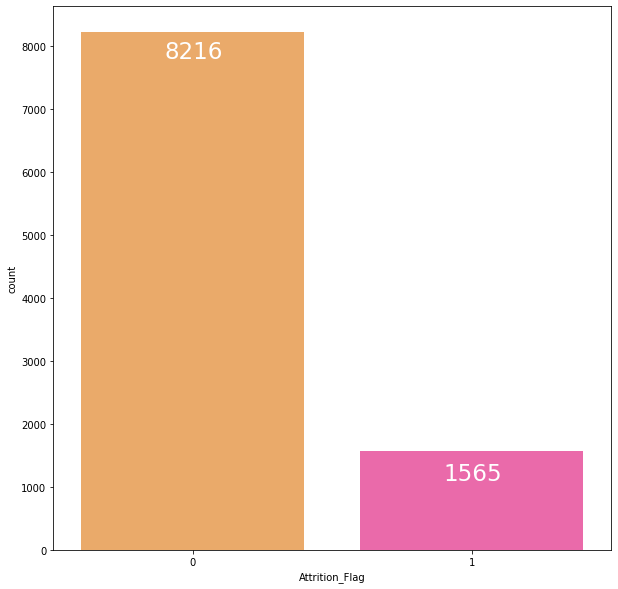

In [27]:
plt.figure(figsize=(10,10))
sb.countplot(data=clean_df, x='Attrition_Flag', palette='spring_r')
plt.annotate('8216', (-0.1,7800), size=23, color='White')
plt.annotate('1565', (0.9,1100), size=23, color='White')

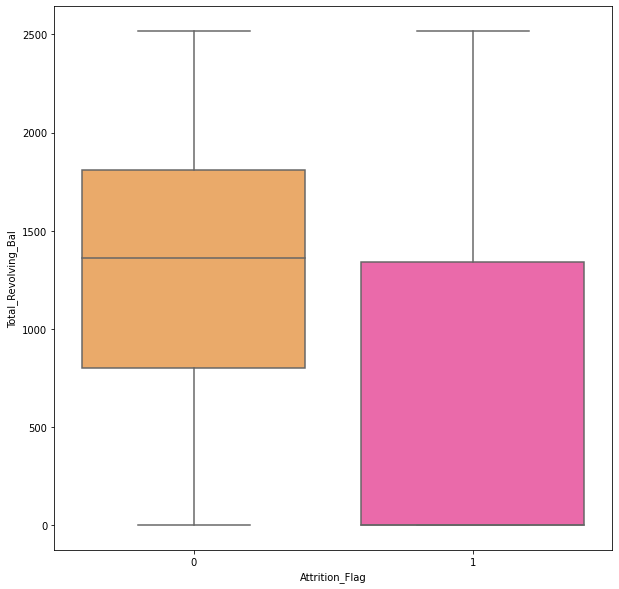

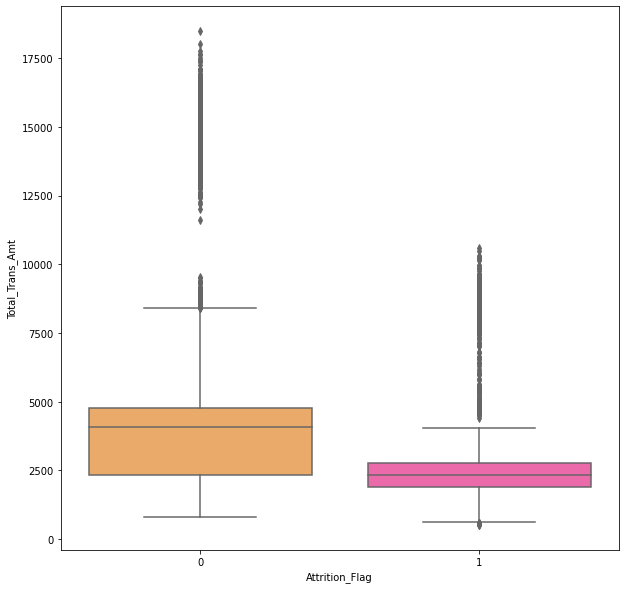

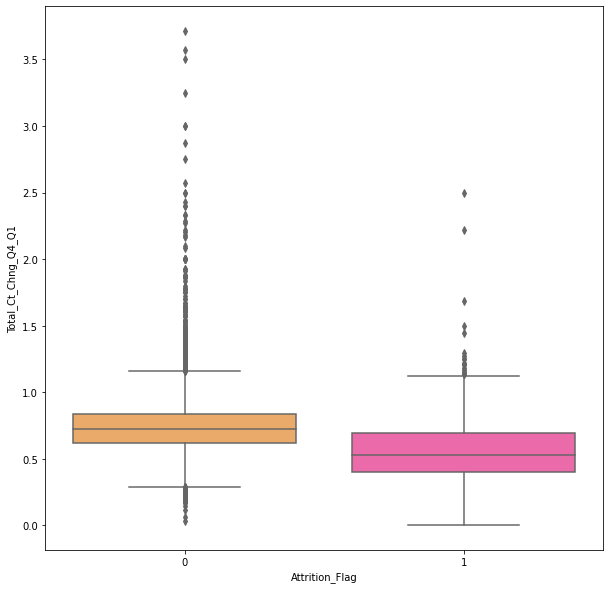

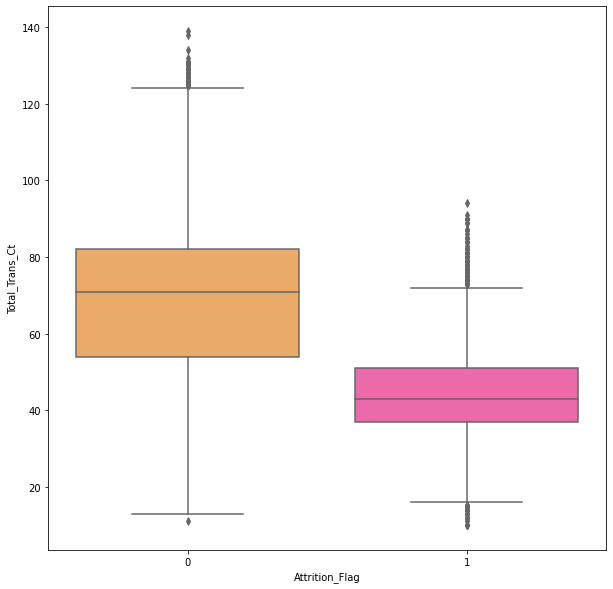

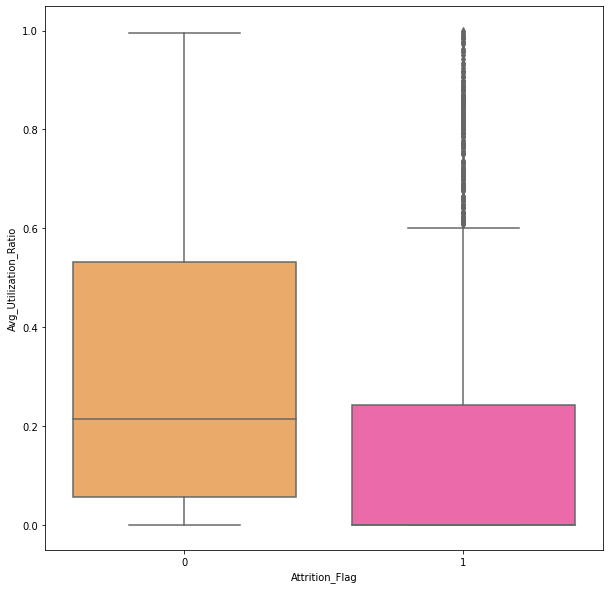

In [29]:
numerical_impt = ['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Avg_Utilization_Ratio', ]
for variable in numerical_impt: 
    plt.figure(figsize=(10,10))
    sb.boxplot(data=clean_df, x='Attrition_Flag', y=variable, palette='spring_r')

<Figure size 1152x1152 with 0 Axes>

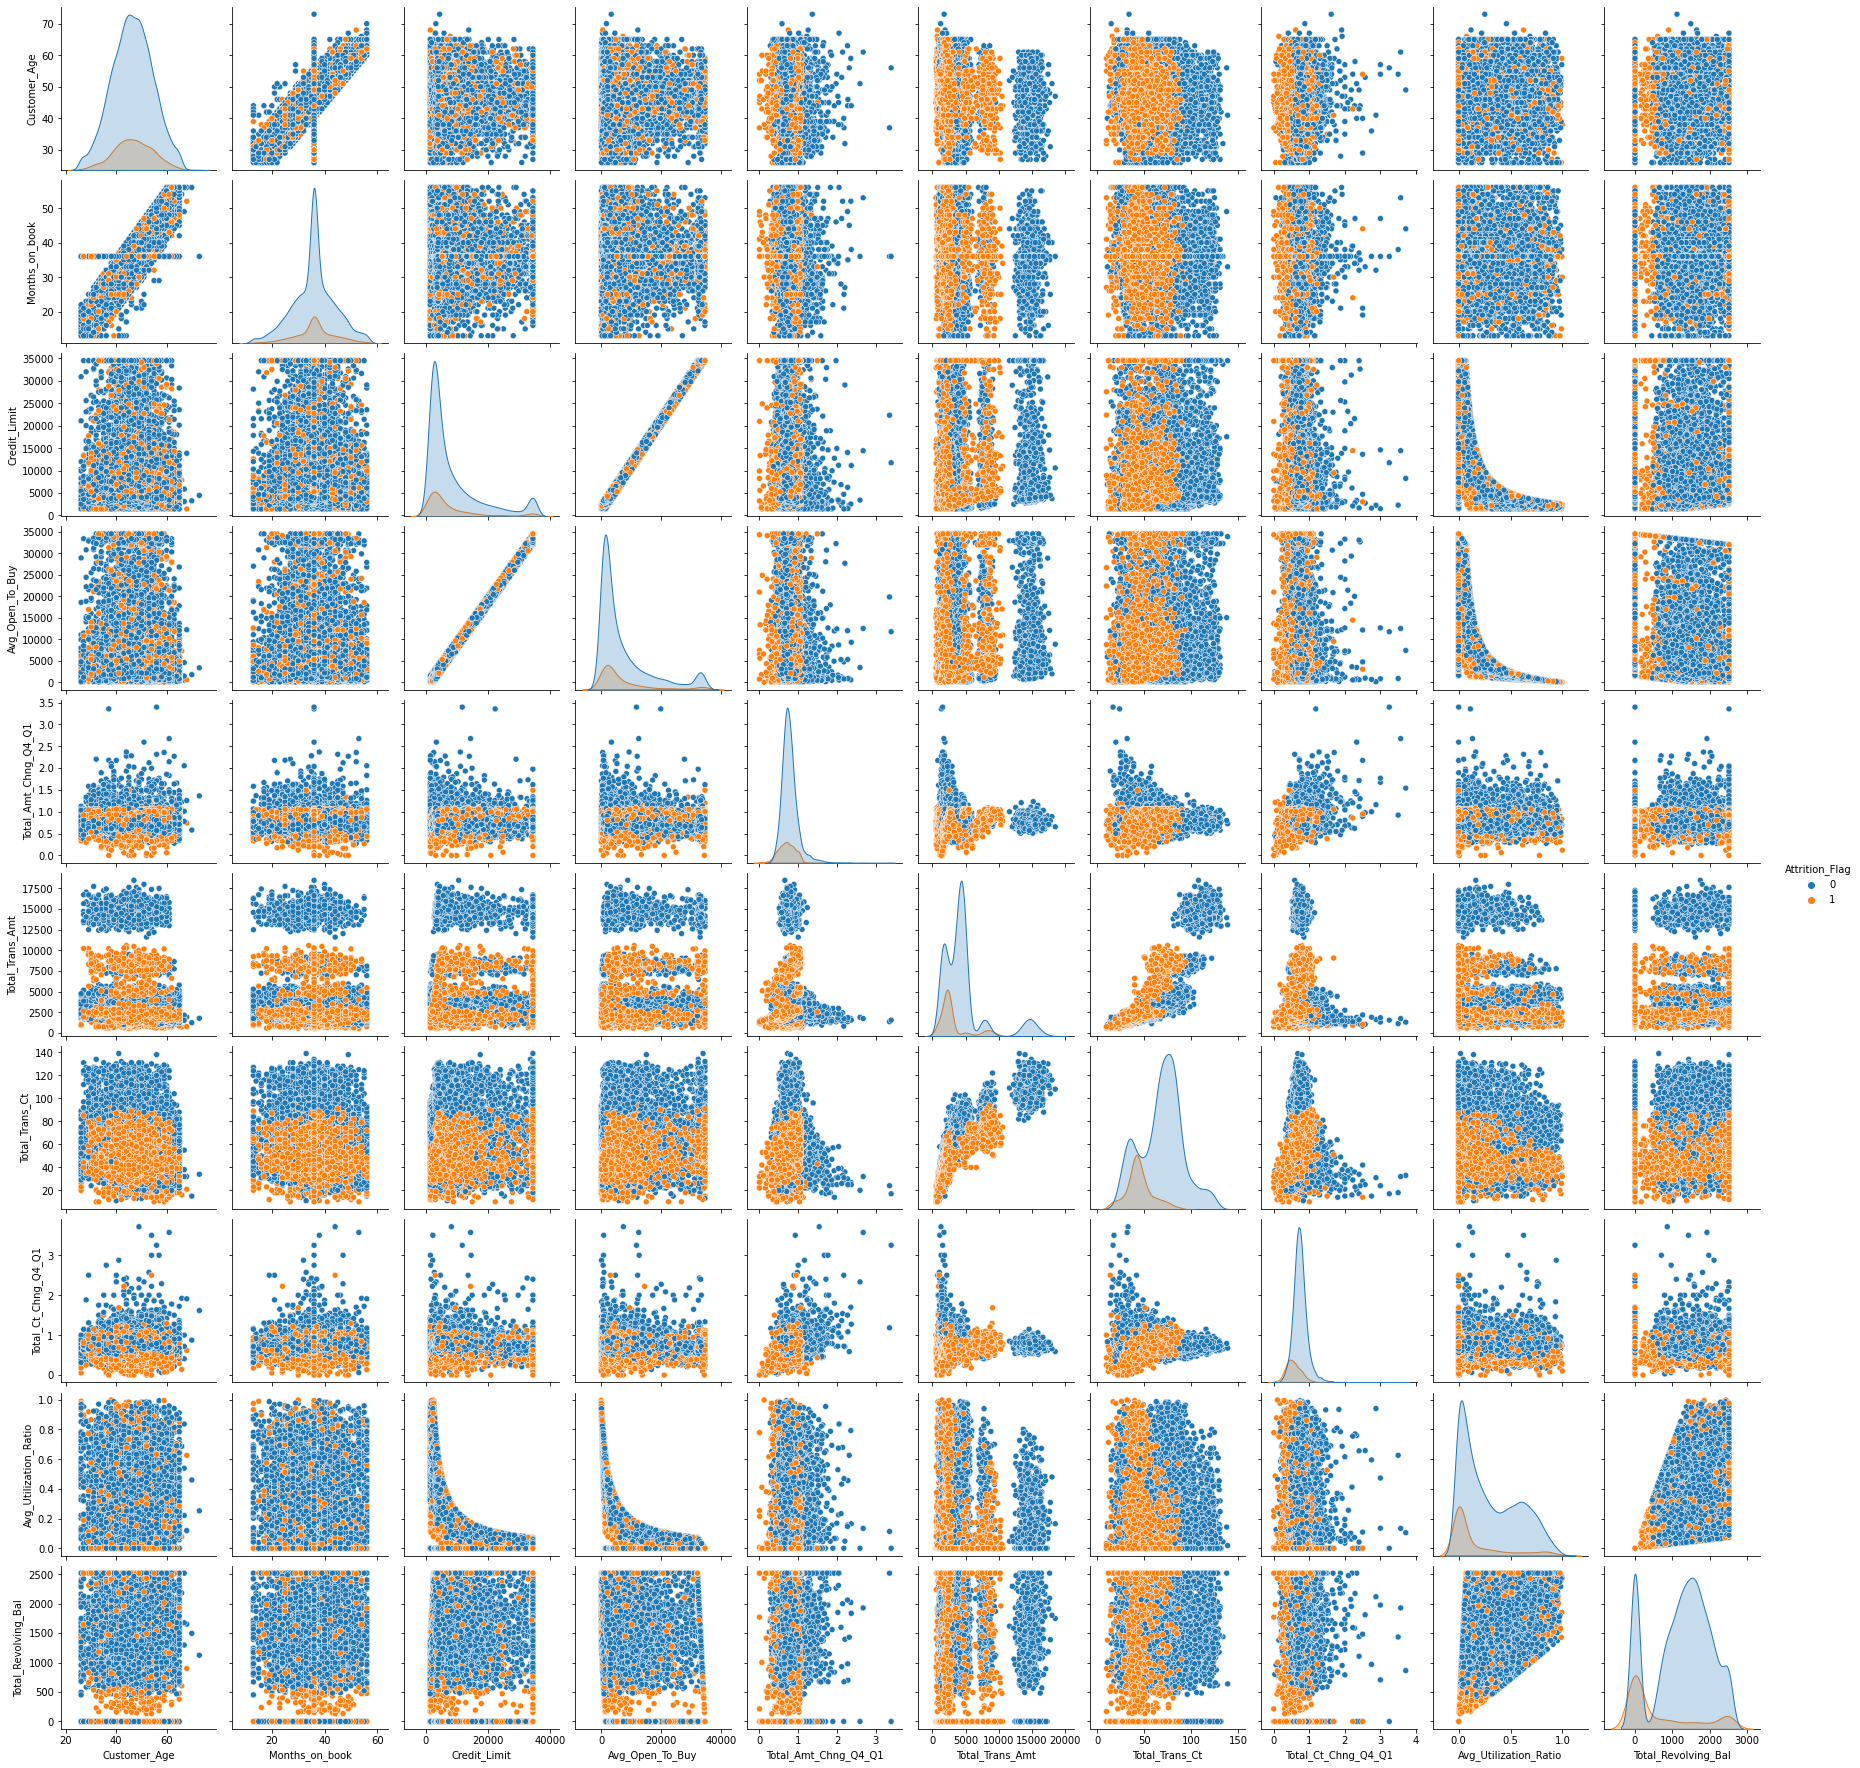

In [126]:
plt.figure(figsize=(16,16))
sb.pairplot(DF[['Attrition_Flag','Customer_Age','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal']], hue = 'Attrition_Flag')
plt.show()

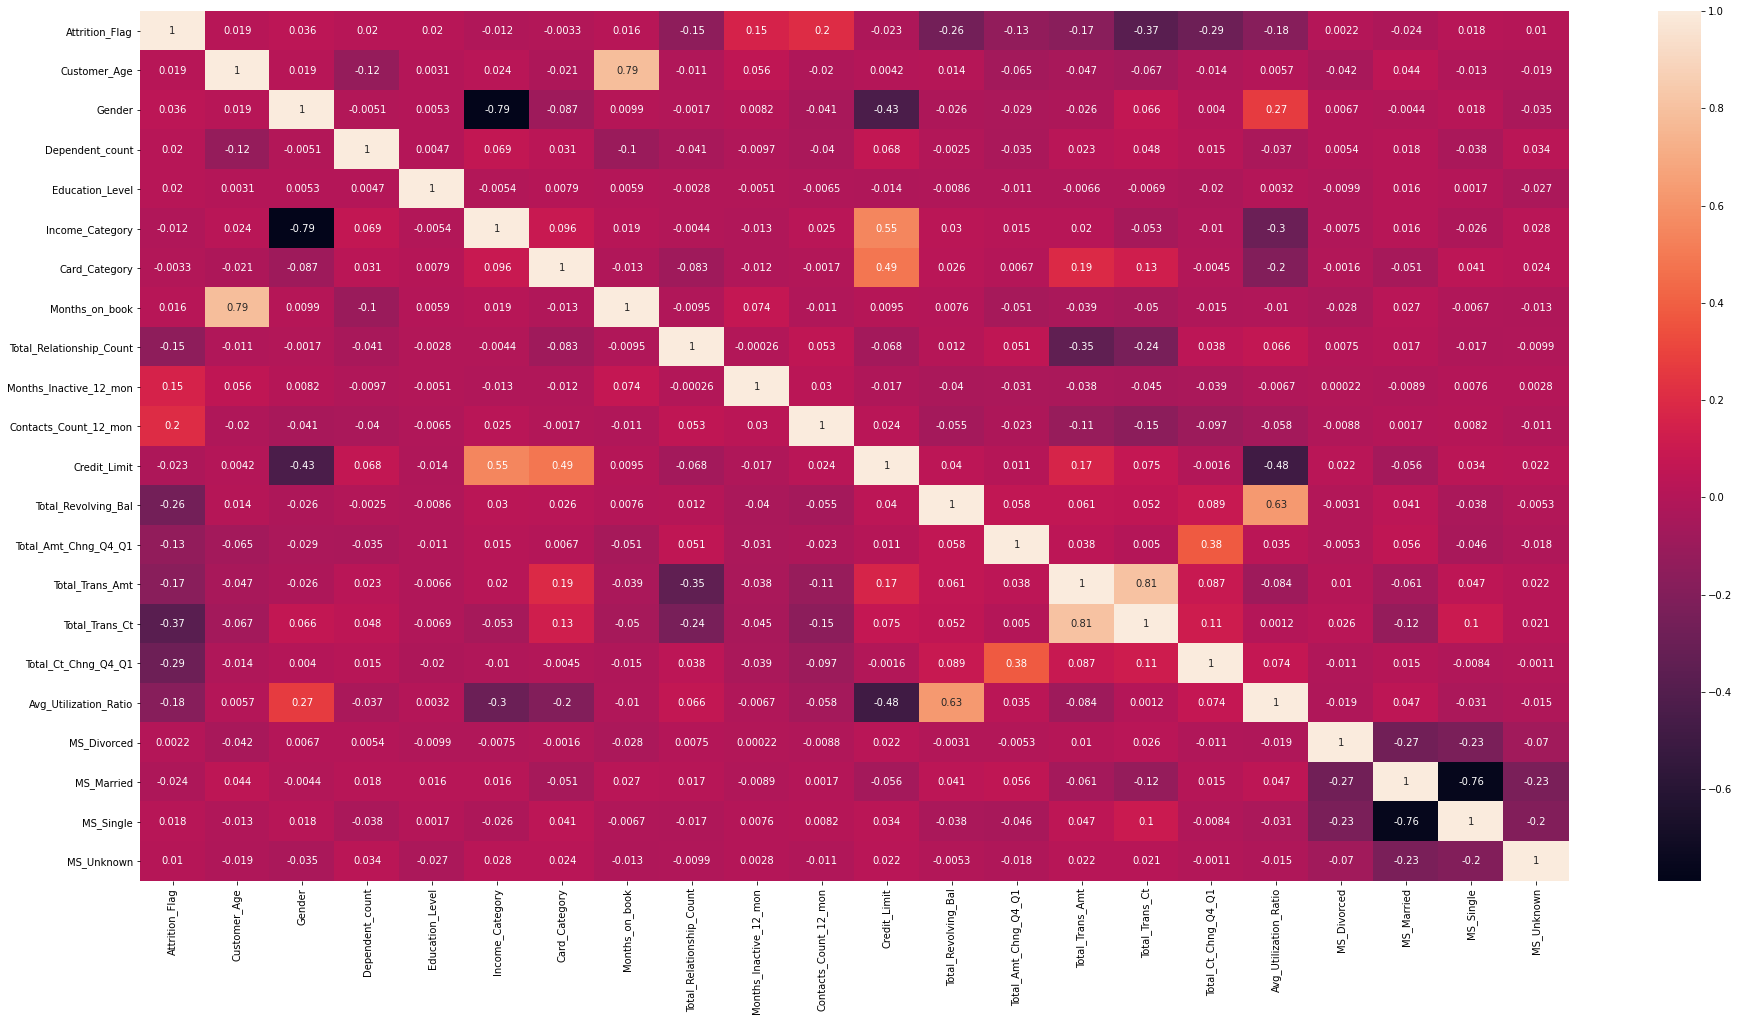

In [24]:
plt.figure(figsize=(16,16))
sb.heatmap(clean_df.corr(), annot=True)
plt.show()

In [22]:
clean_df = clean_df.drop(['Avg_Open_To_Buy'], axis = 1)

# Platinum EDA
1. Income category 
2. Gender
3. Total Revolving Balance < 1000
4. Avg_Utilisation_Ratio <= 0.25
5. Total Trans Amt
6. Total Trans Ct

In [152]:
platinum

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
443                0            48      M                3        Graduate   
650                0            51      F                3   Post-Graduate   
3800               1            51      F                2       Doctorate   
8631               0            51      M                0       Doctorate   
8863               1            43      M                3   Post-Graduate   
8897               0            45      M                4        Graduate   
9068               1            54      F                0        Graduate   
9071               0            41      M                4        Graduate   
9078               0            39      F                1        Graduate   
9102               1            51      F                2        Graduate   
9113               0            45      M                2        Graduate   
9127               0            56      F                3      Uneducated   
9183               1            48      F                4        Graduate   
9306               0            44      M                2      Uneducated   
9319               0            54      M                2   Post-Graduate   
9550               0            45      F                2     High School   
9618               0            42      M                3      Uneducated   
9828               0            43      M                3        Graduate   
9858               0            51      F                3        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
443         Unknown    $80K - $120K      Platinum              41   
650        Divorced         Unknown      Platinum              34   
3800        Married  Less than $40K      Platinum              42   
8631         Single         $120K +      Platinum              44   
8863        Married     $40K - $60K      Platinum              31   
8897         Single         $120K +      Platinum              34   
9068         Single         Unknown      Platinum              38   
9071        Married     $60K - $80K      Platinum              26   
9078         Single  Less than $40K      Platinum              35   
9102         Single         Unknown      Platinum              32   
9113        Married     $60K - $80K      Platinum              31   
9127         Single         Unknown      Platinum              46   
9183         Single  Less than $40K      Platinum              37   
9306        Married         $120K +      Platinum              36   
9319        Married     $60K - $80K      Platinum              42   
9550         Single  Less than $40K      Platinum              36   
9618        Married         $120K +      Platinum              23   
9828         Single     $60K - $80K      Platinum              35   
9858         Single         Unknown      Platinum              42   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
443                          3                       2                      2   
650                          3                       1                      2   
3800                         3                       2                      3   
8631                         3                       2                      3   
8863                         2                       3                      4   
8897                         2                       2                      1   
9068                         2                       2                      2   
9071                         1                       1                      2   
9078                         1                       2                      3   
9102                         2                       3                      3   
9113                         2                       2                      1   
9127                         2                       3                      2   
9183       

In [155]:
platinum[platinum['Attrition_Flag']==1]

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
3800               1            51      F                2       Doctorate   
8863               1            43      M                3   Post-Graduate   
9068               1            54      F                0        Graduate   
9102               1            51      F                2        Graduate   
9183               1            48      F                4        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
3800        Married  Less than $40K      Platinum              42   
8863        Married     $40K - $60K      Platinum              31   
9068         Single         Unknown      Platinum              38   
9102         Single         Unknown      Platinum              32   
9183         Single  Less than $40K      Platinum              37   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3800                         3                       2                      3   
8863                         2                       3                      4   
9068                         2                       2                      2   
9102                         2                       3                      3   
9183                         5                       3                      4   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
3800       15987.0                  193          15794.0   
8863       23981.0                  593          23388.0   
9068       34516.0                    0          34516.0   
9102       34516.0                  531          33985.0   
9183       15987.0                    0          15987.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3800                 0.435             2021              46   
8863                 0.987             4758              65   
9068                 0.695             3901              54   
9102                 0.980             5418              65   
9183                 0.827             7681              71   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
3800                0.394                  0.012  
8863                0.512                  0.025  
9068                0.421                  0.000  
9102                0.711                  0.015  
9183                0.690                  0.000

In [163]:
platinum.sort_values(by=['Total_Revolving_Bal']).head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9183               1            48      F                4        Graduate   
9068               1            54      F                0        Graduate   
9127               0            56      F                3      Uneducated   
3800               1            51      F                2       Doctorate   
9102               1            51      F                2        Graduate   
8863               1            43      M                3   Post-Graduate   
9113               0            45      M                2        Graduate   
9306               0            44      M                2      Uneducated   
8897               0            45      M                4        Graduate   
9078               0            39      F                1        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9183         Single  Less than $40K      Platinum              37   
9068         Single         Unknown      Platinum              38   
9127         Single         Unknown      Platinum              46   
3800        Married  Less than $40K      Platinum              42   
9102         Single         Unknown      Platinum              32   
8863        Married     $40K - $60K      Platinum              31   
9113        Married     $60K - $80K      Platinum              31   
9306        Married         $120K +      Platinum              36   
8897         Single         $120K +      Platinum              34   
9078         Single  Less than $40K      Platinum              35   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9183                         5                       3                      4   
9068                         2                       2                      2   
9127                         2                       3                      2   
3800                         3                       2                      3   
9102                         2                       3                      3   
8863                         2                       3                      4   
9113                         2                       2                      1   
9306                         2                       1                      3   
8897                         2                       2                      1   
9078                         1                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9183       15987.0                    0          15987.0   
9068       34516.0                    0          34516.0   
9127       34516.0                    0          34516.0   
3800       15987.0                  193          15794.0   
9102       34516.0                  531          33985.0   
8863       23981.0                  593          23388.0   
9113       34516.0                 1308          33208.0   
9306       34516.0                 1421          33095.0   
8897       34516.0                 1488          33028.0   
9078       15987.0                 1494          14493.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9183                 0.827             7681              71   
9068                 0.695             3901              54   
9127                 0.887             8416              93   
3800                 0.435             2021              46   
9102                 0.980             5418              65   
8863                 0.987             4758              65   
9113                 0.746             8773             105   
9306                 0.744            14465             114   
8897                 0.732             7281              95   
9078                 0.731             8438              92   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9183                0.690                  0.000  
9068                0.421             

In [162]:
platinum.sort_values(by=['Avg_Utilization_Ratio']).head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
9183               1            48      F                4        Graduate   
9068               1            54      F                0        Graduate   
9127               0            56      F                3      Uneducated   
3800               1            51      F                2       Doctorate   
9102               1            51      F                2        Graduate   
8863               1            43      M                3   Post-Graduate   
9113               0            45      M                2        Graduate   
9306               0            44      M                2      Uneducated   
8897               0            45      M                4        Graduate   
443                0            48      M                3        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
9183         Single  Less than $40K      Platinum              37   
9068         Single         Unknown      Platinum              38   
9127         Single         Unknown      Platinum              46   
3800        Married  Less than $40K      Platinum              42   
9102         Single         Unknown      Platinum              32   
8863        Married     $40K - $60K      Platinum              31   
9113        Married     $60K - $80K      Platinum              31   
9306        Married         $120K +      Platinum              36   
8897         Single         $120K +      Platinum              34   
443         Unknown    $80K - $120K      Platinum              41   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9183                         5                       3                      4   
9068                         2                       2                      2   
9127                         2                       3                      2   
3800                         3                       2                      3   
9102                         2                       3                      3   
8863                         2                       3                      4   
9113                         2                       2                      1   
9306                         2                       1                      3   
8897                         2                       2                      1   
443                          3                       2                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9183       15987.0                    0          15987.0   
9068       34516.0                    0          34516.0   
9127       34516.0                    0          34516.0   
3800       15987.0                  193          15794.0   
9102       34516.0                  531          33985.0   
8863       23981.0                  593          23388.0   
9113       34516.0                 1308          33208.0   
9306       34516.0                 1421          33095.0   
8897       34516.0                 1488          33028.0   
443        34516.0                 1531          32985.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9183                 0.827             7681              71   
9068                 0.695             3901              54   
9127                 0.887             8416              93   
3800                 0.435             2021              46   
9102                 0.980             5418              65   
8863                 0.987             4758              65   
9113                 0.746             8773             105   
9306                 0.744            14465             114   
8897                 0.732             7281              95   
443                  0.862             1156              29   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9183                0.690                  0.000  
9068                0.421             

In [161]:
platinum.sort_values(by=['Total_Trans_Amt']).head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
443                0            48      M                3        Graduate   
650                0            51      F                3   Post-Graduate   
3800               1            51      F                2       Doctorate   
9068               1            54      F                0        Graduate   
8863               1            43      M                3   Post-Graduate   
9102               1            51      F                2        Graduate   
8897               0            45      M                4        Graduate   
9183               1            48      F                4        Graduate   
8631               0            51      M                0       Doctorate   
9127               0            56      F                3      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
443         Unknown    $80K - $120K      Platinum              41   
650        Divorced         Unknown      Platinum              34   
3800        Married  Less than $40K      Platinum              42   
9068         Single         Unknown      Platinum              38   
8863        Married     $40K - $60K      Platinum              31   
9102         Single         Unknown      Platinum              32   
8897         Single         $120K +      Platinum              34   
9183         Single  Less than $40K      Platinum              37   
8631         Single         $120K +      Platinum              44   
9127         Single         Unknown      Platinum              46   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
443                          3                       2                      2   
650                          3                       1                      2   
3800                         3                       2                      3   
9068                         2                       2                      2   
8863                         2                       3                      4   
9102                         2                       3                      3   
8897                         2                       2                      1   
9183                         5                       3                      4   
8631                         3                       2                      3   
9127                         2                       3                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
443        34516.0                 1531          32985.0   
650        34516.0                 1578          32938.0   
3800       15987.0                  193          15794.0   
9068       34516.0                    0          34516.0   
8863       23981.0                  593          23388.0   
9102       34516.0                  531          33985.0   
8897       34516.0                 1488          33028.0   
9183       15987.0                    0          15987.0   
8631       34516.0                 1925          32591.0   
9127       34516.0                    0          34516.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
443                  0.862             1156              29   
650                  0.725             1929              40   
3800                 0.435             2021              46   
9068                 0.695             3901              54   
8863                 0.987             4758              65   
9102                 0.980             5418              65   
8897                 0.732             7281              95   
9183                 0.827             7681              71   
8631                 0.764             8012              87   
9127                 0.887             8416              93   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
443                 1.071                  0.044  
650                 0.481             

In [167]:
platinum.sort_values(by=['Total_Trans_Ct']).head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
443                0            48      M                3        Graduate   
650                0            51      F                3   Post-Graduate   
3800               1            51      F                2       Doctorate   
9068               1            54      F                0        Graduate   
9102               1            51      F                2        Graduate   
8863               1            43      M                3   Post-Graduate   
9183               1            48      F                4        Graduate   
8631               0            51      M                0       Doctorate   
9078               0            39      F                1        Graduate   
9127               0            56      F                3      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
443         Unknown    $80K - $120K      Platinum              41   
650        Divorced         Unknown      Platinum              34   
3800        Married  Less than $40K      Platinum              42   
9068         Single         Unknown      Platinum              38   
9102         Single         Unknown      Platinum              32   
8863        Married     $40K - $60K      Platinum              31   
9183         Single  Less than $40K      Platinum              37   
8631         Single         $120K +      Platinum              44   
9078         Single  Less than $40K      Platinum              35   
9127         Single         Unknown      Platinum              46   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
443                          3                       2                      2   
650                          3                       1                      2   
3800                         3                       2                      3   
9068                         2                       2                      2   
9102                         2                       3                      3   
8863                         2                       3                      4   
9183                         5                       3                      4   
8631                         3                       2                      3   
9078                         1                       2                      3   
9127                         2                       3                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
443        34516.0                 1531          32985.0   
650        34516.0                 1578          32938.0   
3800       15987.0                  193          15794.0   
9068       34516.0                    0          34516.0   
9102       34516.0                  531          33985.0   
8863       23981.0                  593          23388.0   
9183       15987.0                    0          15987.0   
8631       34516.0                 1925          32591.0   
9078       15987.0                 1494          14493.0   
9127       34516.0                    0          34516.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
443                  0.862             1156              29   
650                  0.725             1929              40   
3800                 0.435             2021              46   
9068                 0.695             3901              54   
9102                 0.980             5418              65   
8863                 0.987             4758              65   
9183                 0.827             7681              71   
8631                 0.764             8012              87   
9078                 0.731             8438              92   
9127                 0.887             8416              93   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
443                 1.071                  0.044  
650                 0.481             

# Machine Learning Models

# RForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

rf = RandomForestClassifier()
print('Parameters currently in use:')
print(rf.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [24]:
# Class Weight
class_weight = ['balanced', 'balanced_subsample']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'class_weight': class_weight,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, }
print(random_grid)

{'class_weight': ['balanced', 'balanced_subsample'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [25]:
# Extract Response and Predictors
y = pd.DataFrame(clean_df['Attrition_Flag'])
X = pd.DataFrame(clean_df.drop('Attrition_Flag', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring='f1_weighted', cv = 3, verbose=2, random_state=21, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.Attrition_Flag.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=21, scoring='f1_weighted', verbose=2)

In [26]:
# Fetch the best Model or the best set of Hyper-parameters
print(rf_random.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(rf_random.best_score_))

RandomForestClassifier(class_weight='balanced', max_depth=90,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1400)
0.9549965138123069


In [28]:
import pickle
filename = 'PROPER_unsampled_f1_rforest_random.sav'
pickle.dump(rf_random, open(filename, 'wb'))

In [33]:
#test on y_test
rf = RandomForestClassifier(class_weight='balanced', max_depth=90,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1400)
rf.fit(X_train, y_train.Attrition_Flag.ravel())
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred, average = 'weighted')

0.9562321249888431

### Upsampling to balance out the dataset

In [34]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_res, y_res = ROS.fit_resample(X_train, y_train)

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid_res = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid_res)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_res = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_res = RandomizedSearchCV(estimator = rf_res, param_distributions = random_grid_res, n_iter = 100, scoring='f1_weighted', cv = 3, verbose=2, random_state=21, n_jobs = -1)
# Fit the random search model
rf_random_res.fit(X_res, y_res.Attrition_Flag.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=21, scoring='f1_weighted', verbose=2)

In [37]:
rf_random_res.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [38]:
# Fetch the best Model or the best set of Hyper-parameters
print(rf_random_res.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(rf_random_res.best_score_))

RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=800)
0.9865988880523023


In [39]:
import pickle
filename = 'PROPER_upsampled_f1_rforest_random.sav'
pickle.dump(rf_random, open(filename, 'wb'))

In [40]:
#test on y_test
rf = RandomForestClassifier(max_depth=100, max_features='sqrt', n_estimators=800)
rf.fit(X_train, y_train.Attrition_Flag.ravel())
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred, average = 'weighted')

0.9605208866016901

Upsampling gives better score

## Find the feature importances

In [41]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(list(X_train.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Total_Trans_Amt      Importance: 0.186
Variable: Total_Trans_Ct       Importance: 0.166
Variable: Total_Revolving_Bal  Importance: 0.112
Variable: Total_Ct_Chng_Q4_Q1  Importance: 0.106
Variable: Avg_Utilization_Ratio Importance: 0.074
Variable: Total_Amt_Chng_Q4_Q1 Importance: 0.069
Variable: Total_Relationship_Count Importance: 0.061
Variable: Credit_Limit         Importance: 0.039
Variable: Customer_Age         Importance: 0.036
Variable: Contacts_Count_12_mon Importance: 0.03
Variable: Months_on_book       Importance: 0.028
Variable: Months_Inactive_12_mon Importance: 0.025
Variable: Dependent_count      Importance: 0.014
Variable: Education_Level      Importance: 0.013
Variable: Income_Category      Importance: 0.012
Variable: Gender               Importance: 0.009
Variable: MS_Married           Importance: 0.006
Variable: MS_Single            Importance: 0.005
Variable: Card_Category        Importance: 0.004
Variable: MS_Divorced          Importance: 0.002
Variable: MS_

## Find the optimum number of variables

In [137]:
varList = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Attrition_Flag']

In [138]:
selected_df = clean_df[varList]

# Extract Response and Predictors
y = pd.DataFrame(selected_df['Attrition_Flag'])
X = pd.DataFrame(selected_df.drop('Attrition_Flag', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Upsample
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_res, y_res = ROS.fit_resample(X_train, y_train)

In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid_res = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid_res)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_res = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_res = RandomizedSearchCV(estimator = rf_res, param_distributions = random_grid_res, n_iter = 100, scoring='f1_weighted', cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random_res.fit(X_res, y_res.Attrition_Flag.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=21, scoring='f1_weighted', verbose=2)

In [30]:
rf_random_res.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [31]:
# Fetch the best Model or the best set of Hyper-parameters
print(rf_random_res.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(rf_random_res.best_score_))

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400)
0.9834297592542914


In [33]:
import pickle
filename = 'PROPER_upsampled_selected_f1_rforest_random.sav'
pickle.dump(rf_random_res, open(filename, 'wb'))

## GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [25, 30, 35],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4],
    'n_estimators': [1300, 1400, 1500]
}
# Create a based model
rf_res = RandomForestClassifier()
# Instantiate the grid search model
grid_search_res = GridSearchCV(estimator = rf_res, param_grid = param_grid, 
                          cv = 10, scoring = 'f1_weighted', n_jobs = -1, verbose = 2)
#Fit the model
grid_search_res.fit(X_res, y_res.Attrition_Flag.ravel())

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [1300, 1400, 1500]},
             scoring='f1_weighted', verbose=2)

In [41]:
grid_search_res.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [28]:
# Fetch the best Model or the best set of Hyper-parameters
print(grid_search_res.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(grid_search_res.best_score_))

RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=1400)
0.9869230794246983


In [29]:
import pickle
filename = 'PROPER_upsampled_selected_f1_rforest_grid.sav'
pickle.dump(grid_search_res, open(filename, 'wb'))

In [144]:
#test on y_test
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400, random_state = 42)
rf.fit(X_res, y_res.Attrition_Flag.ravel())
print(rf.score(X_test, y_test.Attrition_Flag.ravel()))
y_pred = rf.predict(X_test[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])
print(f1_score(y_test, y_pred, average = 'weighted'))

0.9570727718724448
0.9570952534470962


In [ ]:
y_train_pred = rf.predict(X_res)
y_test_pred = rf.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_res, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [60]:
print(roc_auc_score(y_test, y_pred))

0.9199462120670202


In [43]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(list(X_train.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Total_Trans_Amt      Importance: 0.277
Variable: Total_Trans_Ct       Importance: 0.238
Variable: Total_Revolving_Bal  Importance: 0.138
Variable: Total_Ct_Chng_Q4_Q1  Importance: 0.108
Variable: Total_Amt_Chng_Q4_Q1 Importance: 0.104
Variable: Avg_Utilization_Ratio Importance: 0.077
Variable: Total_Relationship_Count Importance: 0.058


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, precision_score, confusion_matrix, f1_score, roc_auc_score

In [30]:
logreg = LogisticRegression(random_state = 42, solver = 'liblinear')

In [95]:
# Create the parameter grid based on the results of random search 
lr_param_grid = {
    'penalty' : ['l1','l2','none'],
    'C': np.linspace(0.1,1.0,10),
    'max_iter': np.linspace(50,150,10),
}

# Create a base model
# Instantiate the grid search model
grid_search_lr = GridSearchCV(estimator = logreg, param_grid = lr_param_grid, scoring = 'f1_weighted',
                    n_jobs =-1, return_train_score=True)

In [96]:
# Extract Response and Predictors
y = pd.DataFrame(clean_df['Attrition_Flag'])
X = pd.DataFrame(clean_df.drop('Attrition_Flag', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Upsample
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_res, y_res = ROS.fit_resample(X_train, y_train)

grid_search_lr.fit(X_res, y_res.Attrition_Flag.ravel())

/apps/python/v3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.84374317 0.84017338        nan        nan 0.84374317 0.84017338
        nan        nan 0.84374317 0.84017338        nan        nan
 0.84374317 0.84017338        nan        nan 0.84374317 0.84017338
        nan        nan 0.84374317 0.84017338        nan        nan
 0.84374317 0.84017338        nan        nan 0.84374317 0.84017338
        nan        nan 0.84374317 0.84017338        nan        nan
 0.84374317 0.84017338        nan        nan 0.84536843 0.84050108
        nan        nan 0.84536843 0.84050108        nan        nan
 0.84536843 0.84050108        nan        nan 0.84536843 0.84050108
        nan        nan 0.84536843 0.84050108        nan        nan
 0.84536843 0.84050108        nan        nan 0.84536843 0.84050108
        nan        nan 0.84536843 0.84050108        nan        nan
 0.84536843 0.84050108        nan        nan 0.8

GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': array([ 50.        ,  61.11111111,  72.22222222,  83.33333333,
        94.44444444, 105.55555556, 116.66666667, 127.77777778,
       138.88888889, 150.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True, scoring='f1_weighted')

In [97]:
print(grid_search_lr.best_estimator_)
print(grid_search_lr.best_score_)

LogisticRegression(C=0.2, max_iter=50.0, penalty='l1', random_state=42,
                   solver='liblinear')
0.8453684275432565


In [98]:
logreg_f1 = LogisticRegression(C=0.2, max_iter=50.0, penalty='l1', random_state=42,
                   solver='liblinear')
logreg_f1.fit(X_res, y_res.Attrition_Flag)
y_pred = logreg_f1.predict(X_test)
# f1 score
f1_score(y_test, y_pred, average = 'weighted')

0.8565909108868157

In [54]:
import pickle
filename = 'logreg_f1_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

## Select Important Features

In [87]:
from sklearn.feature_selection import RFE

In [91]:
selector = RFE(logreg_f1, n_features_to_select = 1) # n = 1 will return all features
selector = selector.fit(X_res,y_res.Attrition_Flag.ravel())

In [49]:
x=1
for i in X_res.columns:
    print(x,":",i)
    x+=1

1 : Customer_Age
2 : Gender
3 : Dependent_count
4 : Education_Level
5 : Income_Category
6 : Card_Category
7 : Months_on_book
8 : Total_Relationship_Count
9 : Months_Inactive_12_mon
10 : Contacts_Count_12_mon
11 : Credit_Limit
12 : Total_Revolving_Bal
13 : Total_Amt_Chng_Q4_Q1
14 : Total_Trans_Amt
15 : Total_Trans_Ct
16 : Total_Ct_Chng_Q4_Q1
17 : Avg_Utilization_Ratio
18 : MS_Divorced
19 : MS_Married
20 : MS_Single
21 : MS_Unknown


In [92]:
order = selector.ranking_
order

array([21,  5, 10, 13, 14,  9, 15,  7,  6,  4, 19, 17,  3, 18, 11,  1,  2,
       16,  8, 12, 20])

In [93]:
feature_ranks = []
for i in order: 
    feature_ranks.append(f"{X_res.columns[i-1]}")
feature_ranks

['MS_Unknown',
 'Income_Category',
 'Contacts_Count_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Months_Inactive_12_mon',
 'Total_Trans_Ct',
 'Months_on_book',
 'Card_Category',
 'Education_Level',
 'MS_Married',
 'Avg_Utilization_Ratio',
 'Dependent_count',
 'MS_Divorced',
 'Credit_Limit',
 'Customer_Age',
 'Gender',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Relationship_Count',
 'Total_Revolving_Bal',
 'MS_Single']

In [117]:
feature_ranks_top = feature_ranks[:7]
feature_ranks_top.append('Attrition_Flag')
feature_ranks_top

['MS_Unknown',
 'Income_Category',
 'Contacts_Count_12_mon',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Months_Inactive_12_mon',
 'Total_Trans_Ct',
 'Attrition_Flag']

In [118]:
selected_df = clean_df[feature_ranks_top]

# Extract Response and Predictors
y = pd.DataFrame(selected_df['Attrition_Flag'])
X = pd.DataFrame(selected_df.drop('Attrition_Flag', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Upsample
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_res, y_res = ROS.fit_resample(X_train, y_train)

In [119]:
# Create the parameter grid based on the results of random search 
lr_param_grid = {
    'penalty' : ['l1','l2','elasticnet','none'],
    'C': np.linspace(0.1,1.0,10),
    'max_iter': np.linspace(40,150,10),
}

# Create a base model
# Instantiate the grid search model
grid_search_lr7 = GridSearchCV(estimator = logreg, param_grid = lr_param_grid, scoring = 'f1_weighted',
                    n_jobs =-1, return_train_score=True)

grid_search_lr7.fit(X_res, y_res.Attrition_Flag.ravel())

/apps/python/v3.8.5/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81090273 0.79610497        nan        nan 0.81090273 0.79610497
        nan        nan 0.81090273 0.79610497        nan        nan
 0.81090273 0.79610497        nan        nan 0.81090273 0.79610497
        nan        nan 0.81090273 0.79610497        nan        nan
 0.81090273 0.79610497        nan        nan 0.81090273 0.79610497
        nan        nan 0.81090273 0.79610497        nan        nan
 0.81090273 0.79610497        nan        nan 0.81025283 0.79829956
        nan        nan 0.81025283 0.79829956        nan        nan
 0.81025283 0.79829956        nan        nan 0.81025283 0.79829956
        nan        nan 0.81025283 0.79829956        nan        nan
 0.81025283 0.79829956        nan        nan 0.81025283 0.79829956
        nan        nan 0.81025283 0.79829956        nan        nan
 0.81025283 0.79829956        nan        nan 0.8

GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': array([ 40.        ,  52.22222222,  64.44444444,  76.66666667,
        88.88888889, 101.11111111, 113.33333333, 125.55555556,
       137.77777778, 150.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             return_train_score=True, scoring='f1_weighted')

In [121]:
print(grid_search_lr.best_estimator_)
print(grid_search_lr.best_score_)

LogisticRegression(C=0.2, max_iter=50.0, penalty='l1', random_state=42,
                   solver='liblinear')
0.8453684275432565


In [122]:
logreg_7 = LogisticRegression(C=0.2, max_iter=50.0, penalty='l1', random_state=42,
                   solver='liblinear')
logreg_7.fit(X_res, y_res.Attrition_Flag)
print(logreg_7.score(X_test, y_test.Attrition_Flag.ravel()))
y_pred = logreg_7.predict(X_test)
# f1 score
print(f1_score(y_test, y_pred, average = 'weighted'))

0.7853638593622241
0.8105781603905334


In [123]:
print(roc_auc_score(y_test, y_pred))

0.8106108808244639


In [125]:
import pickle
filename = 'logreg_f1_model_sfm_7.sav'
pickle.dump(logreg_7, open(filename, 'wb'))

# EDA with model results

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

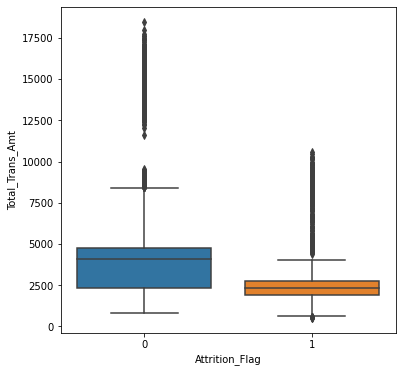

In [144]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Trans_Amt')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

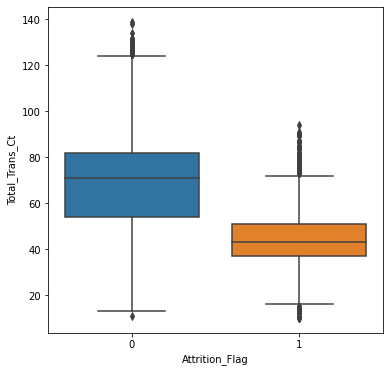

In [145]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Trans_Ct')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

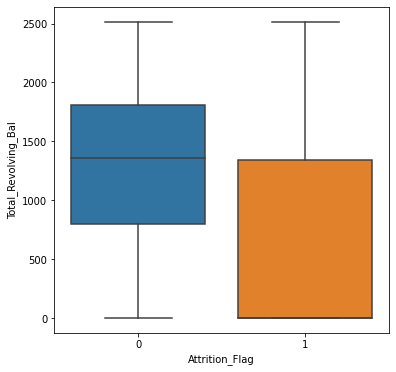

In [146]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Revolving_Bal')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Ct_Chng_Q4_Q1'>

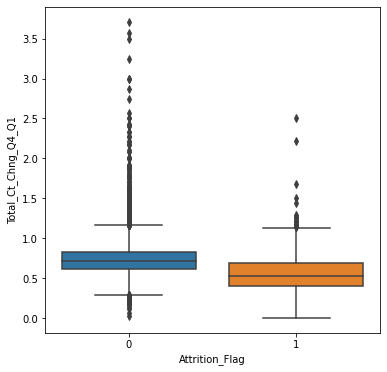

In [147]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Ct_Chng_Q4_Q1')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

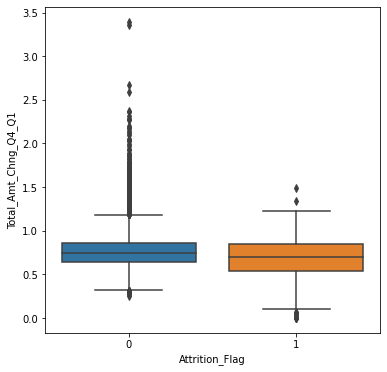

In [148]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Amt_Chng_Q4_Q1')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

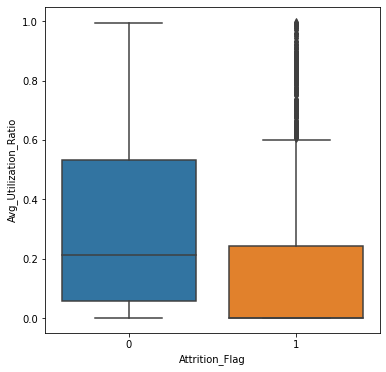

In [149]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

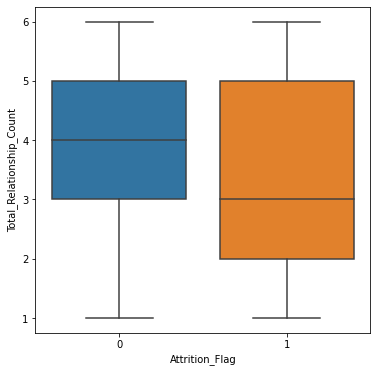

In [150]:
plt.figure(figsize=(6,6))
sb.boxplot(data = clean_df, x = 'Attrition_Flag', y = 'Total_Relationship_Count')

In [151]:
rs_count_grpby = pd.DataFrame(clean_df.groupby('Total_Relationship_Count').Attrition_Flag.value_counts())
rs_count_grpby['Percentage'] = rs_count_grpby.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
rs_count_grpby

Attrition_Flag  Percentage
Total_Relationship_Count Attrition_Flag                            
1                        0                          648   74.141876
                         1                          226   25.858124
2                        0                          854   72.434266
                         1                          325   27.565734
3                        0                         1856   82.672606
                         1                          389   17.327394
4                        0                         1635   88.282937
                         1                          217   11.717063
5                        0                         1611   88.177340
                         1                          216   11.822660
6                        0                         1612   89.356984
                         1                          192   10.643016

# Using the results from our random forest model

In [25]:
varList = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Attrition_Flag']

In [26]:
selected_df = clean_df[varList]

# Extract Response and Predictors
y = pd.DataFrame(selected_df['Attrition_Flag'])
X = pd.DataFrame(selected_df.drop('Attrition_Flag', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Upsample
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_res, y_res = ROS.fit_resample(X_train, y_train)

Classification Accuracy 	: 0.7395748160261651



<AxesSubplot:>

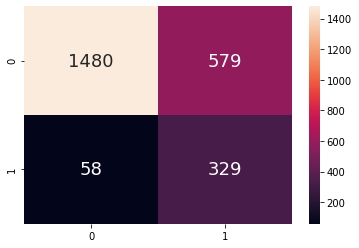

In [113]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_res, y_res)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_test_pred = dectree.predict(X_test)

print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(334.8, 543.6, 'X[1] <= 57.5\ngini = 0.5\nsamples = 12314\nvalue = [6157, 6157]'),
 Text(167.4, 326.16, 'X[2] <= 667.0\ngini = 0.381\nsamples = 6834\nvalue = [1751, 5083]'),
 Text(83.7, 108.72000000000003, 'gini = 0.129\nsamples = 3646\nvalue = [253, 3393]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.498\nsamples = 3188\nvalue = [1498, 1690]'),
 Text(502.20000000000005, 326.16, 'X[0] <= 5287.5\ngini = 0.315\nsamples = 5480\nvalue = [4406, 1074]'),
 Text(418.5, 108.72000000000003, 'gini = 0.09\nsamples = 3611\nvalue = [3441, 170]'),
 Text(585.9, 108.72000000000003, 'gini = 0.499\nsamples = 1869\nvalue = [965, 904]')]

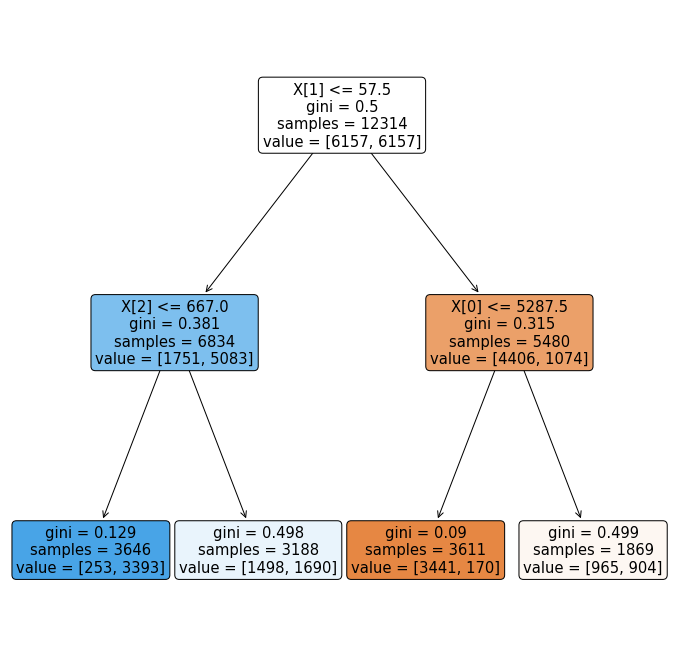

In [114]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True)

### Changing Total_Trans_Ct

In [57]:
X_test_copy = X_test.copy()

#test on y_test
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400, random_state = 42)
rf.fit(X_res, y_res.Attrition_Flag.ravel())
y_pred = rf.predict(X_test_copy)

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy)
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba'] = y_predict_proba

In [58]:
# Increment Total Trans Ct by 25% 
#X_test_copy['Total_Trans_Amt'] = 1.1* X_test_copy['Total_Trans_Amt']
X_test_copy['Total_Trans_Ct'] = 1.2*X_test_copy['Total_Trans_Ct']
#X_test_copy['Total_Ct_Chng_Q4_Q1'] = X_test_copy['Total_Ct_Chng_Q4_Q1']*1.2
#X_test_copy['Total_Amt_Chng_Q4_Q1'] = X_test_copy['Total_Amt_Chng_Q4_Q1']*1.1

In [59]:
y_pred = rf.predict(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba_After'] = y_predict_proba

In [60]:
X_test_copy['Attrition_Proba_Change'] = X_test_copy['Attrition_Proba_After']- X_test_copy['Attrition_Proba']

In [61]:
after = len(X_test_copy[X_test_copy['Attrition_Proba_After']>0.5])
before = len(X_test_copy[X_test_copy['Attrition_Proba']>0.5])
decrease_percent = (before-after)/before * 100
decrease_percent

-3.865979381443299

### Changing Total_Relationship_Count

In [84]:
X_test_copy = X_test.copy()

#test on y_test
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400, random_state = 42)
rf.fit(X_res, y_res.Attrition_Flag.ravel())
y_pred = rf.predict(X_test_copy)

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy)
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba'] = y_predict_proba

In [85]:
# Increment by 1
#X_test_copy['Total_Relationship_Count'] = 2+X_test_copy['Total_Relationship_Count']

In [86]:
#Increment only for those with attrition probability > 0.5
X_test_copy.loc[(X_test_copy['Attrition_Proba']>0.5), 'Total_Relationship_Count'] = X_test_copy['Total_Relationship_Count']+3

In [87]:
y_pred = rf.predict(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba_After'] = y_predict_proba

In [88]:
X_test_copy['Attrition_Proba_Change'] = X_test_copy['Attrition_Proba_After']- X_test_copy['Attrition_Proba']

In [89]:
after = len(X_test_copy[X_test_copy['Attrition_Proba_After']>0.5])
before = len(X_test_copy[X_test_copy['Attrition_Proba']>0.5])
decrease_percent = (before-after)/before * 100
decrease_percent

13.917525773195877

## Change in Q4_Q1

In [100]:
X_test_copy = X_test.copy()

#test on y_test
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400, random_state = 42)
rf.fit(X_res, y_res.Attrition_Flag.ravel())
y_pred = rf.predict(X_test_copy)

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy)
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba'] = y_predict_proba

In [101]:
# Reduce change in trans by 10% for those whose change < 1
X_test_copy.loc[(X_test_copy['Total_Ct_Chng_Q4_Q1']<1), 'Total_Ct_Chng_Q4_Q1'] = X_test_copy['Total_Ct_Chng_Q4_Q1']*1.2
X_test_copy.loc[(X_test_copy['Total_Amt_Chng_Q4_Q1']<1), 'Total_Amt_Chng_Q4_Q1'] = X_test_copy['Total_Amt_Chng_Q4_Q1']*1.2

In [102]:
y_pred = rf.predict(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba_After'] = y_predict_proba

In [103]:
X_test_copy['Attrition_Proba_Change'] = X_test_copy['Attrition_Proba_After']- X_test_copy['Attrition_Proba']

In [104]:
after = len(X_test_copy[X_test_copy['Attrition_Proba_After']>0.5])
before = len(X_test_copy[X_test_copy['Attrition_Proba']>0.5])
decrease_percent = (before-after)/before * 100
decrease_percent

12.628865979381443

## Avg Utilisation Ratio

In [79]:
X_test_copy = X_test.copy()

#test on y_test
rf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=1400, random_state = 42)
rf.fit(X_res, y_res.Attrition_Flag.ravel())
y_pred = rf.predict(X_test_copy)

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy)
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba'] = y_predict_proba

In [80]:
# Increment Avg Util Ratio by 10% 
X_test_copy['Avg_Utilization_Ratio'] = 1.25*X_test_copy['Avg_Utilization_Ratio']

In [81]:
y_pred = rf.predict(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])

# To get Attrition Probability Column
y_predict_proba = rf.predict_proba(X_test_copy[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count']])
y_predict_proba = y_predict_proba[:,1]
X_test_copy['Attrition_Proba_After'] = y_predict_proba

In [82]:
X_test_copy['Attrition_Proba_Change'] = X_test_copy['Attrition_Proba_After']- X_test_copy['Attrition_Proba']

In [83]:
after = len(X_test_copy[X_test_copy['Attrition_Proba_After']>0.5])
before = len(X_test_copy[X_test_copy['Attrition_Proba']>0.5])
decrease_percent = (before-after)/before * 100
decrease_percent

0.25773195876288657